# Milestone 1
Dasboard Tableau : https://public.tableau.com/app/profile/ardiansyah.arya.salvinia/viz/DasboardMilestone1/Dashboard

Batch 016 | Ardiansyah Arya Salvinia

### Topik Permasalahan
Finances

### Latar Belakang

Saya adalah data analyst di Iowa, ditugaskan untuk melakukan analisa pada dataset penjualan minuman keras di Iowa Amerkia Serikat. Perusahaan ingin melakukan investasi ke daerah/county yang memiliki pendapatan minuman keras tertinggi serta investasi ke vendor yang menjual jenis minuman keras yang memiliki pendapatan tertinggi. Data yang akan digunakan adalah data penjualan minuman keras dari tahun 2021 sampai 2022.

### Problem Statement
Perusahaan akan melakukan investasi ke county yang memiliki pertumbuhan revenue tertinggi ditentukan dengan data perkembangan dari tahun 2021 sampai juni 2022. Prediksikan pendapatan pada 1 bulan selanjutnya pada keseluruhan dan county yang memiliki pertumbuhan revenue tertinggi. 

### Penjabaran
1. Ada berapa county di iowa pada tahun 2021-2022?
2. County manakah yang memiliki toko minuman keras terbanyak pada tahun 2021-2022? dan berapa jumalah total toko di iowa?
3. County apa saja yang memiliki penjualan terbanyak dalam jumlah botol minuman keras pada tahun 2021-2022?
4. Apakah county yang menjual minuman keras terbanyak menghasilkan pendapatan terbanyak pada tahun 2021-2022 juga?
5. Minuman keras apa yang paling banyak terjual di iowa pada tahun 2021-2022?
6. Minuman keras apa saja yang memiliki pendapatan tertinggi pada tahun 2021-2022? (pendapatan = harga jual - harga produksi)
7. Apakah minuman keras yang berpendapatan paling tinggi terjual paling banyak di county berpendapatan tertinggi atau tidak?
8. Pada 3 county teratas dilakukan perhitungan persentase pertumbuhan revenue, county mana yang mempunyai pertumbuhan tertinggi?
9. Distribusi seperti apa nilai pertumbuhan revenue pada county teratas? dan bila ada outlier apa yang akan dilakukan?
10. Setelah outlier dibersihkan. dilakukan kalkulasi confidence interval 95%. Berapa range kira kira kenaikan pendapatan pada 1 bulan ke depan di county tersebut?
11. Apakah ada outlier pada pendapatan per-bulan total negara bagian Iowa pada tahun 2021-2022? jika ada tentukan metode penghandlean outlier sesuai dengan distribusi data.
12. Setelah outlier dibersihkan. menurut confidence interval 95%, berapa range kira-kira kenaikan pendapatan pada 1 bulan ke depan di iowa?

### Import Library

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Data Loading

Dataset didapatkan dari google bigquery public dataset, dataset iowa liquor sales

In [309]:
df = pd.read_csv('dataset_liquor_iowa.csv')

### Query SQL

In [310]:
'''
SELECT  AS                                          # Melakukan pengambilan data
invoice_and_item_number AS invoice_number,          # dari kolom dan diubah namanya
date AS tanggal,                                    # untuk mempermudah pembacaan
store_name AS nama_toko, 
county,
zip_code, 
category_name AS kategori, 
vendor_name AS nama_vendor,
item_description AS nama_minuman,
state_bottle_cost AS harga_produksi,
state_bottle_retail AS harga_jual,
bottles_sold AS botol_terjual,
sale_dollars AS harga_invoice
FROM `bigquery-public-data.iowa_liquor_sales.sales` # Dari dataset iowa tabel sales
WHERE date >= '2021-01-01'                          # Dibatasi data dari 2021 saja
ORDER BY date;                                      # Diurutkan berdasarkan tanggal
'''

"\nSELECT  AS                                          # Melakukan pengambilan data\ninvoice_and_item_number AS invoice_number,          # dari kolom dan diubah namanya\ndate AS tanggal,                                    # untuk mempermudah pembacaan\nstore_name AS nama_toko, \ncounty,\nzip_code, \ncategory_name AS kategori, \nvendor_name AS nama_vendor,\nitem_description AS nama_minuman,\nstate_bottle_cost AS harga_produksi,\nstate_bottle_retail AS harga_jual,\nbottles_sold AS botol_terjual,\nsale_dollars AS harga_invoice\nFROM `bigquery-public-data.iowa_liquor_sales.sales` # Dari dataset iowa tabel sales\nWHERE date >= '2021-01-01'                          # Dibatasi data dari 2021 saja\nORDER BY date;                                      # Diurutkan berdasarkan tanggal\n"

### Eksplorasi Dataset

In [311]:
# Melihat preview total dataframe

df 

,invoice_number,tanggal,nama_toko,county,zip_code,kategori,nama_vendor,nama_minuman,harga_produksi,harga_jual,botol_terjual,harga_invoice
0,INV-33187200005,2021-01-04,Hy-Vee Food Store / Eldora,HARDIN,50627.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,24,376.32
1,INV-33197900016,2021-01-04,Ehlinger's Vinton Express,BENTON,52349.0,American Schnapps,Jim Beam Brands,Dekuyper Cherry Pucker,7.87,11.81,2,23.62
2,INV-33179700195,2021-01-04,Hy-Vee Wine and Spirits / Storm Lake,BUENA VIST,50588.0,American Schnapps,LUXCO INC,Paramount Peach Schnapps,5.00,7.50,3,22.50
3,INV-33189400005,2021-01-04,Cody Mart Gas & Liquor,SCOTT,52753.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,6,94.08
4,INV-33178300079,2021-01-04,Hy-Vee Food Store / Carroll,CARROLL,51401.0,American Brandies,LUXCO INC,Paramount Peach Brandy,5.50,8.25,6,49.50
...,...,...,...,...,...,...,...,...,...,...,...,...
3879888,INV-48842000075,2022-06-30,Hy-Vee Food Store #3 / Sioux City,WOODBURY,51105.0,Imported Vodkas,BACARDI USA INC,Grey Goose,26.50,39.75,6,238.50
3879889,INV-48821200004,2022-06-30,Kum & Go #1215 / Ames,STORY,50010.0,American Vodkas,FIFTH GENERATION INC,Titos Handmade Vodka,13.17,19.76,12,237.12
3879890,INV-48836700007,2022-06-30,Northside Liquor and Grocery / Mason City,CERRO GORD,50401.0,Cocktails /RTD,Mhw LTD,Twisted Shotz Pineapple Upisde Down Cake,54.18,81.27,1,81.27
3879891,INV-48823000007,2022-06-30,Hy-Vee Food Store / Altoona,POLK,50009.0,Cream Liqueurs,SAZERAC COMPANY INC,Ryans Cream Liqueur,11.54,17.31,6,103.86


Dikarenakan penulis salah menamakan kolom nama harga_produksi yang seharusnya adalah harga_beli. Dilakukan penamaan ulang kolom.

In [312]:
# Melakukan penamaan ulang menggunakan fungsi rename.

df=df.rename({'harga_produksi':'harga_beli'}, axis=1)
df

,invoice_number,tanggal,nama_toko,county,zip_code,kategori,nama_vendor,nama_minuman,harga_beli,harga_jual,botol_terjual,harga_invoice
0,INV-33187200005,2021-01-04,Hy-Vee Food Store / Eldora,HARDIN,50627.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,24,376.32
1,INV-33197900016,2021-01-04,Ehlinger's Vinton Express,BENTON,52349.0,American Schnapps,Jim Beam Brands,Dekuyper Cherry Pucker,7.87,11.81,2,23.62
2,INV-33179700195,2021-01-04,Hy-Vee Wine and Spirits / Storm Lake,BUENA VIST,50588.0,American Schnapps,LUXCO INC,Paramount Peach Schnapps,5.00,7.50,3,22.50
3,INV-33189400005,2021-01-04,Cody Mart Gas & Liquor,SCOTT,52753.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,6,94.08
4,INV-33178300079,2021-01-04,Hy-Vee Food Store / Carroll,CARROLL,51401.0,American Brandies,LUXCO INC,Paramount Peach Brandy,5.50,8.25,6,49.50
...,...,...,...,...,...,...,...,...,...,...,...,...
3879888,INV-48842000075,2022-06-30,Hy-Vee Food Store #3 / Sioux City,WOODBURY,51105.0,Imported Vodkas,BACARDI USA INC,Grey Goose,26.50,39.75,6,238.50
3879889,INV-48821200004,2022-06-30,Kum & Go #1215 / Ames,STORY,50010.0,American Vodkas,FIFTH GENERATION INC,Titos Handmade Vodka,13.17,19.76,12,237.12
3879890,INV-48836700007,2022-06-30,Northside Liquor and Grocery / Mason City,CERRO GORD,50401.0,Cocktails /RTD,Mhw LTD,Twisted Shotz Pineapple Upisde Down Cake,54.18,81.27,1,81.27
3879891,INV-48823000007,2022-06-30,Hy-Vee Food Store / Altoona,POLK,50009.0,Cream Liqueurs,SAZERAC COMPANY INC,Ryans Cream Liqueur,11.54,17.31,6,103.86


harga_produksi telah diubah menjadi harga_beli

In [313]:
# Melihat jenis data pada dataset, dan preview kasar.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879893 entries, 0 to 3879892
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   invoice_number  object 
 1   tanggal         object 
 2   nama_toko       object 
 3   county          object 
 4   zip_code        float64
 5   kategori        object 
 6   nama_vendor     object 
 7   nama_minuman    object 
 8   harga_beli      float64
 9   harga_jual      float64
 10  botol_terjual   int64  
 11  harga_invoice   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 355.2+ MB


Dikarenakan akan melakukan manipulasi date, diubah tanggal menjadi datetime

In [314]:
# Pengubahan tipe data kolom tanggal menggunakan fungsi pandas to datetime

df['tanggal']= pd.to_datetime(df['tanggal'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3879893 entries, 0 to 3879892
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   invoice_number  object        
 1   tanggal         datetime64[ns]
 2   nama_toko       object        
 3   county          object        
 4   zip_code        float64       
 5   kategori        object        
 6   nama_vendor     object        
 7   nama_minuman    object        
 8   harga_beli      float64       
 9   harga_jual      float64       
 10  botol_terjual   int64         
 11  harga_invoice   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 355.2+ MB


In [315]:
# Menambahkan kolom bulan dan tahun untuk membantu analisa kenaikan pendapatan.
# Menggunakan fungsi dt.year dan dt.month untuk mendapatkan nilai dari tanggal.

df['year']=df['tanggal'].dt.year
df['month']=df['tanggal'].dt.month
df


,invoice_number,tanggal,nama_toko,county,zip_code,kategori,nama_vendor,nama_minuman,harga_beli,harga_jual,botol_terjual,harga_invoice,year,month
0,INV-33187200005,2021-01-04,Hy-Vee Food Store / Eldora,HARDIN,50627.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,24,376.32,2021,1
1,INV-33197900016,2021-01-04,Ehlinger's Vinton Express,BENTON,52349.0,American Schnapps,Jim Beam Brands,Dekuyper Cherry Pucker,7.87,11.81,2,23.62,2021,1
2,INV-33179700195,2021-01-04,Hy-Vee Wine and Spirits / Storm Lake,BUENA VIST,50588.0,American Schnapps,LUXCO INC,Paramount Peach Schnapps,5.00,7.50,3,22.50,2021,1
3,INV-33189400005,2021-01-04,Cody Mart Gas & Liquor,SCOTT,52753.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,6,94.08,2021,1
4,INV-33178300079,2021-01-04,Hy-Vee Food Store / Carroll,CARROLL,51401.0,American Brandies,LUXCO INC,Paramount Peach Brandy,5.50,8.25,6,49.50,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879888,INV-48842000075,2022-06-30,Hy-Vee Food Store #3 / Sioux City,WOODBURY,51105.0,Imported Vodkas,BACARDI USA INC,Grey Goose,26.50,39.75,6,238.50,2022,6
3879889,INV-48821200004,2022-06-30,Kum & Go #1215 / Ames,STORY,50010.0,American Vodkas,FIFTH GENERATION INC,Titos Handmade Vodka,13.17,19.76,12,237.12,2022,6
3879890,INV-48836700007,2022-06-30,Northside Liquor and Grocery / Mason City,CERRO GORD,50401.0,Cocktails /RTD,Mhw LTD,Twisted Shotz Pineapple Upisde Down Cake,54.18,81.27,1,81.27,2022,6
3879891,INV-48823000007,2022-06-30,Hy-Vee Food Store / Altoona,POLK,50009.0,Cream Liqueurs,SAZERAC COMPANY INC,Ryans Cream Liqueur,11.54,17.31,6,103.86,2022,6


In [316]:
# Melihat 10 data awal dataframe

df.head(10)

,invoice_number,tanggal,nama_toko,county,zip_code,kategori,nama_vendor,nama_minuman,harga_beli,harga_jual,botol_terjual,harga_invoice,year,month
0,INV-33187200005,2021-01-04,Hy-Vee Food Store / Eldora,HARDIN,50627.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,24,376.32,2021,1
1,INV-33197900016,2021-01-04,Ehlinger's Vinton Express,BENTON,52349.0,American Schnapps,Jim Beam Brands,Dekuyper Cherry Pucker,7.87,11.81,2,23.62,2021,1
2,INV-33179700195,2021-01-04,Hy-Vee Wine and Spirits / Storm Lake,BUENA VIST,50588.0,American Schnapps,LUXCO INC,Paramount Peach Schnapps,5.00,7.50,3,22.50,2021,1
3,INV-33189400005,2021-01-04,Cody Mart Gas & Liquor,SCOTT,52753.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,6,94.08,2021,1
4,INV-33178300079,2021-01-04,Hy-Vee Food Store / Carroll,CARROLL,51401.0,American Brandies,LUXCO INC,Paramount Peach Brandy,5.50,8.25,6,49.50,2021,1
5,INV-33181700056,2021-01-04,Hy-Vee #3 Food & Drugstore / Davenport,SCOTT,52807.0,American Schnapps,SAZERAC NORTH AMERICA,99 Blue Raspberries,5.16,7.74,3,23.22,2021,1
6,INV-33193900027,2021-01-04,Fareway Stores #963 / Cedar Rapids,LINN,52404.0,Blended Whiskies,DIAGEO AMERICAS,Seagrams 7 Crown,12.96,19.44,6,116.64,2021,1
7,INV-33177600009,2021-01-04,MAD Ave Quik Shop,WAPELLO,52501.0,Canadian Whiskies,Prestige Wine & Spirits Group,Windsor Canadian,6.29,9.44,2,18.88,2021,1
8,INV-33193200126,2021-01-04,Hy-Vee Food Store #1 / Cedar Rapids,LINN,52405.0,Canadian Whiskies,DIAGEO AMERICAS,Crown Royal Mini,7.35,11.03,3,33.09,2021,1
9,INV-33175000032,2021-01-04,Kum & Go #74 / West Des Moines,POLK,50266.0,Canadian Whiskies,DIAGEO AMERICAS,Crown Royal,8.00,12.00,3,36.00,2021,1


In [317]:
# Melihat 10 data akhir dataframe

df.tail(10)

,invoice_number,tanggal,nama_toko,county,zip_code,kategori,nama_vendor,nama_minuman,harga_beli,harga_jual,botol_terjual,harga_invoice,year,month
3879883,INV-48838300016,2022-06-30,Kum & Go #542 / Urbandale,POLK,50323.0,Whiskey Liqueur,SAZERAC COMPANY INC,Fireball Cinnamon Whiskey,5.33,8.00,6,48.00,2022,6
3879884,INV-48817600085,2022-06-30,Hy-Vee #3 / BDI / Des Moines,POLK,50320.0,White Rum,SERRALLES USA,Don Q Cristal,7.50,11.25,12,135.00,2022,6
3879885,INV-48838300011,2022-06-30,Kum & Go #542 / Urbandale,POLK,50323.0,Mixto Tequila,PROXIMO,Jose Cuervo Especial Reposado Mini,12.33,18.50,6,103.50,2022,6
3879886,INV-48831300022,2022-06-30,Family Pantry,POLK,50310.0,Imported Vodkas,BACARDI USA INC,Grey Goose,8.50,12.75,4,51.00,2022,6
3879887,INV-48842000042,2022-06-30,Hy-Vee Food Store #3 / Sioux City,WOODBURY,51105.0,Blended Whiskies,Jim Beam Brands,Beams 8 Star Bl Whiskey,8.00,12.00,6,72.00,2022,6
3879888,INV-48842000075,2022-06-30,Hy-Vee Food Store #3 / Sioux City,WOODBURY,51105.0,Imported Vodkas,BACARDI USA INC,Grey Goose,26.50,39.75,6,238.50,2022,6
3879889,INV-48821200004,2022-06-30,Kum & Go #1215 / Ames,STORY,50010.0,American Vodkas,FIFTH GENERATION INC,Titos Handmade Vodka,13.17,19.76,12,237.12,2022,6
3879890,INV-48836700007,2022-06-30,Northside Liquor and Grocery / Mason City,CERRO GORD,50401.0,Cocktails /RTD,Mhw LTD,Twisted Shotz Pineapple Upisde Down Cake,54.18,81.27,1,81.27,2022,6
3879891,INV-48823000007,2022-06-30,Hy-Vee Food Store / Altoona,POLK,50009.0,Cream Liqueurs,SAZERAC COMPANY INC,Ryans Cream Liqueur,11.54,17.31,6,103.86,2022,6
3879892,INV-48836800001,2022-06-30,Northside Liquor and Grocery / Mason City,CERRO GORD,50401.0,American Vodkas,FIFTH GENERATION INC,Titos Handmade Vodka Mini,12.80,19.20,30,576.00,2022,6


Dari dataframe diatas, ternyata awal dataframe dimulai dari tanggal 18 mei, sedangkan penulis melakukan filtering dari tanggal 1 januari. Harus dilakukan pengurutan terlebih dahulu. Untuk tanggal berakhir dataset memang hanya memiliki data sampai 30 juni saja.

In [318]:
# Melakukan pengurutan berdasarkan tanggal data dimasukan untuk memastikan data awal pada hari 1 januari 2021

df.sort_values('tanggal')

,invoice_number,tanggal,nama_toko,county,zip_code,kategori,nama_vendor,nama_minuman,harga_beli,harga_jual,botol_terjual,harga_invoice,year,month
0,INV-33187200005,2021-01-04,Hy-Vee Food Store / Eldora,HARDIN,50627.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,24,376.32,2021,1
7283,INV-33176800021,2021-01-04,Kum & Go #121 / Urbandale,POLK,50322.0,American Vodkas,JDSO INC / Red Boot Distillery,Blue Ox Vodka,7.10,10.65,6,63.90,2021,1
7284,INV-33193200012,2021-01-04,Hy-Vee Food Store #1 / Cedar Rapids,LINN,52405.0,Gold Rum,LUXCO INC,Paramount Gold Rum PET,4.00,6.00,12,72.00,2021,1
7285,INV-33198900003,2021-01-04,Iowa Mini Mart,SCOTT,52801.0,Gold Rum,LUXCO INC,Paramount Gold Rum,4.00,6.00,12,72.00,2021,1
7286,INV-33188000014,2021-01-04,Wal-Mart 2889 / Clinton,CLINTON,52732.0,Cream Liqueurs,DIAGEO AMERICAS,Baileys Original Irish Cream,32.49,48.74,6,292.44,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873894,INV-48840500016,2022-06-30,Thunder Ridge Ampride,BLACK HAWK,50613.0,Straight Bourbon Whiskies,SAZERAC COMPANY INC,Kentucky Tavern Bourbon,4.25,6.38,1,6.38,2022,6
3873895,INV-48818900020,2022-06-30,Fareway Stores #155 / Huxley,STORY,50124.0,Temporary & Specialty Packages,CEDAR RIDGE VINEYARDS LL,Cedar Ridge Bottled in Bond Bourbon,25.00,37.50,6,225.00,2022,6
3873896,INV-48837800030,2022-06-30,Casey's General Store #2816 / Johnston,POLK,50131.0,American Vodkas,FIFTH GENERATION INC,Titos Handmade Vodka,10.00,15.00,3,45.00,2022,6
3873890,INV-48827100001,2022-06-30,Sycamore Convenience,BLACK HAWK,50703.0,American Brandies,Heaven Hill Brands,Christian Bros Brandy,3.25,4.88,24,117.12,2022,6


Ternyata setelah penulis telaah, tanggal 1 januari masuk hari libur negara bagian iowa, dimana data tidak dimasukan. Namun ada keanehan karena data dimulai tanggal 4 januari. Padahal tanggal 3 januari adalah hari senin dimana tidak ada hari libur nasional sama sekali. Data perlu di eksplorasi lebih lanjut.

In [319]:
# Membuat variabel baru untuk menyimpan data tanggal, dan menggunakan fungsi drop_duplicates untuk melihat tanggal unik saja

ex=df['tanggal'].sort_values().drop_duplicates()

In [320]:
# Melihat 20 data awal dari variabel

ex.head(20)

0        2021-01-04
18631    2021-01-05
28555    2021-01-06
35984    2021-01-07
45267    2021-01-08
55660    2021-01-11
66210    2021-01-12
76577    2021-01-13
85313    2021-01-14
95090    2021-01-15
105590   2021-01-18
115885   2021-01-19
125777   2021-01-20
134207   2021-01-21
143933   2021-01-22
154676   2021-01-25
164857   2021-01-26
174588   2021-01-27
182984   2021-01-28
571857   2021-01-29
Name: tanggal, dtype: datetime64[ns]

Ternyata dapat disimpulkan, bahwa input data ini memiliki pattern dimana hari minggu dan senin kosong. Dan di input dari hari selasa sampai sabtu, sehinggak kejanggalan data awal adalah 4 januari terjawab.

### Data Cleaning

In [321]:
# Melihat apakah ada data null pada dataframe

df.isnull().sum()

invoice_number      0
tanggal             0
nama_toko           0
county            773
zip_code          773
kategori            0
nama_vendor         4
nama_minuman        0
harga_beli          0
harga_jual          0
botol_terjual       0
harga_invoice       0
year                0
month               0
dtype: int64

Terdapat data null pada county, yang dimana data tersebut sangatlah penting. Sehingga data yang null akan dihapus

In [322]:
# Melakukan pembersihan nilai null dengan menghapus barisnya.

df = df.dropna()

In [323]:
# Melakukan pengecekan ulang apakah null sudah benar benar hilang.

df.isnull().sum()

invoice_number    0
tanggal           0
nama_toko         0
county            0
zip_code          0
kategori          0
nama_vendor       0
nama_minuman      0
harga_beli        0
harga_jual        0
botol_terjual     0
harga_invoice     0
year              0
month             0
dtype: int64

Dataframe sudah bersih.

Karena terdeteksi perbedaan penamaan toko dan county, dilakukan penyetaraan penamaan pada kolom yang memiliki peran penting dalam proses analisa yang akan dilakukan. Supaya kolom tidak akan terdapat duplikat dan data berkumpul di satu tempat yang sama saat proses groupby. 

In [324]:
# Manipulasi string dengan menggunakan fungsi title dimana setiap kalimat
# akan diawali dengan huruf kapital termasuk setelah spasi.

df['county']=df['county'].str.title()
df['nama_toko']=df['nama_toko'].str.title()
df['nama_vendor']=df['nama_vendor'].str.title()
df['nama_minuman']=df['nama_minuman'].str.title()
df

C:\Users\toshi\AppData\Local\Temp\ipykernel_3528\1794300695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['county']=df['county'].str.title()
C:\Users\toshi\AppData\Local\Temp\ipykernel_3528\1794300695.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nama_toko']=df['nama_toko'].str.title()
C:\Users\toshi\AppData\Local\Temp\ipykernel_3528\1794300695.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,invoice_number,tanggal,nama_toko,county,zip_code,kategori,nama_vendor,nama_minuman,harga_beli,harga_jual,botol_terjual,harga_invoice,year,month
0,INV-33187200005,2021-01-04,Hy-Vee Food Store / Eldora,Hardin,50627.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,24,376.32,2021,1
1,INV-33197900016,2021-01-04,Ehlinger'S Vinton Express,Benton,52349.0,American Schnapps,Jim Beam Brands,Dekuyper Cherry Pucker,7.87,11.81,2,23.62,2021,1
2,INV-33179700195,2021-01-04,Hy-Vee Wine And Spirits / Storm Lake,Buena Vist,50588.0,American Schnapps,Luxco Inc,Paramount Peach Schnapps,5.00,7.50,3,22.50,2021,1
3,INV-33189400005,2021-01-04,Cody Mart Gas & Liquor,Scott,52753.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,6,94.08,2021,1
4,INV-33178300079,2021-01-04,Hy-Vee Food Store / Carroll,Carroll,51401.0,American Brandies,Luxco Inc,Paramount Peach Brandy,5.50,8.25,6,49.50,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879888,INV-48842000075,2022-06-30,Hy-Vee Food Store #3 / Sioux City,Woodbury,51105.0,Imported Vodkas,Bacardi Usa Inc,Grey Goose,26.50,39.75,6,238.50,2022,6
3879889,INV-48821200004,2022-06-30,Kum & Go #1215 / Ames,Story,50010.0,American Vodkas,Fifth Generation Inc,Titos Handmade Vodka,13.17,19.76,12,237.12,2022,6
3879890,INV-48836700007,2022-06-30,Northside Liquor And Grocery / Mason City,Cerro Gord,50401.0,Cocktails /RTD,Mhw Ltd,Twisted Shotz Pineapple Upisde Down Cake,54.18,81.27,1,81.27,2022,6
3879891,INV-48823000007,2022-06-30,Hy-Vee Food Store / Altoona,Polk,50009.0,Cream Liqueurs,Sazerac Company Inc,Ryans Cream Liqueur,11.54,17.31,6,103.86,2022,6


Data string sudah seragam. Selanjutnya akan dilakukan penjawaban penjabaran masalah.

### Jawaban

#### 1. Mencari jumlah county

In [325]:
# Mengambil data county saja dari dataset.
# Digunakan fungsi drop_duplicates agar hanya tersisa data unik.

county=df['county'].drop_duplicates()
county

0            Hardin
1            Benton
2        Buena Vist
3             Scott
4           Carroll
            ...    
38494    Pocahontas
38535        Taylor
38565         Lucas
59176       Madison
88069       Fremont
Name: county, Length: 99, dtype: object

Terdapat 99 county yang terdata pada dataset liquor sales iowa. Selanjutnya akan dilakukan query untuk mencari jumlah toko di iowa.

#### 2.Mencari jumlah toko pada setiap county dan total toko di iowa

In [326]:
# Melakukan grouping pada county, dan nama_toko difilter hanya yang unik nya saja dan dihitung jumlah barisnya.
# Diurutkan dari jumlah_toko terbanyak, namun menggunakan kolom nama_toko karena kolom belum berubah nama.
# Kolum nama_toko diubah namanya menjadi jumlah_toko agar lebih mudah dimengerti.

jumlah_toko=df.groupby('county')['nama_toko'].nunique().reset_index().sort_values('nama_toko',ascending=False).rename({'nama_toko':'jumlah_toko'},axis=1)
jumlah_toko

,county,jumlah_toko
76,Polk,274
56,Linn,141
6,Black Hawk,95
81,Scott,91
51,Johnson,83
...,...,...
86,Taylor,4
35,Fremont,3
25,Davis,2
79,Ringgold,2


County Polk memiliki jumlah toko terbanyak dibanding county lain di iowa, dimana hampir 2x nya dari county 2 tertinggi. Kemungkinan besar polk memiliki penjualan minuman keras tertinggi di iowa. Selanjutnya akan dilakukan visualisasi menggunakan plot agar tabel lebih mudah dibaca.

<AxesSubplot:xlabel='county'>

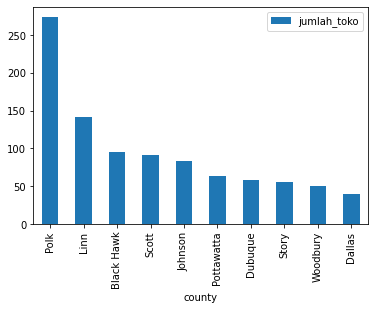

In [327]:
# Melakukan plotting untuk visualisasi tabel dan hanya mengambil 10 besarnya saja.
# Menggunakan fungsi head untuk menamgbil data teratas

jumlah_toko.head(10).plot(kind='bar',x='county',y='jumlah_toko')

Plot yang dihasilkan dari tabel, dengan membawa 10 nilai teratas. Setelah terdata county yang memiliki jumlah toko terbanyak. Penulis akan menjumlahkan toko nya untuk mendapatkan total toko di negara bagian iowa.

In [328]:
# Melakukan aggregating sum pada kolom jumlah_toko dan dimasukan ke variabel total.
# Mencetak kalimat dan jumlah toko.

total=jumlah_toko['jumlah_toko'].sum()
print(f'total jumlah toko yang ada di iowa selama 2021-2022 adalah {total}')

total jumlah toko yang ada di iowa selama 2021-2022 adalah 2034


Ternyata ada total 2034 toko pada 99 county di iowa. Yang dimana 274 toko berada di Polk. Kota polk sendiri berarti memiliki paling tidak 10% pendapatan total dari penjualan minuman keras di Iowa kalo melihat dari data jumalah toko. Selanjutnya penulis akan mencari tahu apakah benar kota Polk memiliki penjualan minuman keras terbanyak.

#### 3.Mencari county dengan penjualan terbanyak

In [329]:
# Melakukan grouping berdasarkan county, dan dihitung jumlah baris invoice number pada tiap county.
# Diurutkan sesuai dengan jumlah penjualan paling banyak, namun menggunakan kolum invoice_number
# dikarenakan kolum belum diubah namanya.
# Pengubahan nama kolum invoice_number menjadi jumlah penjualan agar mudah dimengerti.

jumlah_penjualan=df.groupby("county")["invoice_number"].count().reset_index().sort_values('invoice_number',ascending=False).rename({'invoice_number':'jumlah_penjualan'},axis=1)
jumlah_penjualan

,county,jumlah_penjualan
76,Polk,736870
56,Linn,322780
81,Scott,223634
6,Black Hawk,215284
51,Johnson,182481
...,...,...
86,Taylor,3148
92,Wayne,3075
25,Davis,2514
79,Ringgold,2305


Ternyata benar, kota polk memiliki penjualan tertinggi dari semua county di iowa. Bahkan melebihi 2x nya county pada posisi kedua. Selanjutnya akan dilakukan visualisasi menggunakan plot agar tabel lebih mudah dibaca.

<AxesSubplot:xlabel='county'>

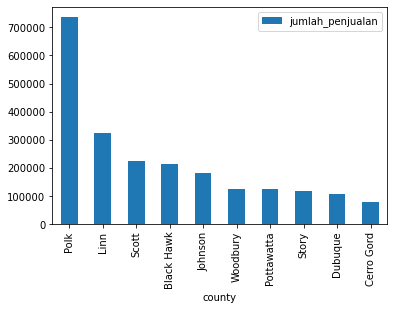

In [330]:
# Melakukan plotting menggunakan data 10 teratas pada tabel.

jumlah_penjualan.head(10).plot(kind='bar',x='county',y='jumlah_penjualan')

Visualisasi plot untuk tabel diatas, yang dimana hanya diambil 10 nilai tertingginya. Selanjutnya akan dilakukan pencarian county dengan jumlah pendapatan terbanyak, karena tidak menutup kemungkinan meskipun Polk memiliki jumlah penjualan tertinggi, namun harga beli dan harga jual nya berbeda sedikit saja. Sehingga bisa menyebabkan county yang dibawahnya memiliki pendapatan lebih tinggi dari kota Polk.

#### 4. Mencari county dengan jumlah pendapatan terbanyak.

In [331]:
# Membuat kolom baru untuk mendapatkan nilai pendapatan agar bisa dilakukan kalkulasi.
# Dikalkulasi dengan cara harga_jual-harga_beli dikalikan botol_terjual

df['pendapatan']= (df['harga_jual'] - df['harga_beli']) * df['botol_terjual']
df

C:\Users\toshi\AppData\Local\Temp\ipykernel_3528\1396326394.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pendapatan']= (df['harga_jual'] - df['harga_beli']) * df['botol_terjual']


,invoice_number,tanggal,nama_toko,county,zip_code,kategori,nama_vendor,nama_minuman,harga_beli,harga_jual,botol_terjual,harga_invoice,year,month,pendapatan
0,INV-33187200005,2021-01-04,Hy-Vee Food Store / Eldora,Hardin,50627.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,24,376.32,2021,1,125.52
1,INV-33197900016,2021-01-04,Ehlinger'S Vinton Express,Benton,52349.0,American Schnapps,Jim Beam Brands,Dekuyper Cherry Pucker,7.87,11.81,2,23.62,2021,1,7.88
2,INV-33179700195,2021-01-04,Hy-Vee Wine And Spirits / Storm Lake,Buena Vist,50588.0,American Schnapps,Luxco Inc,Paramount Peach Schnapps,5.00,7.50,3,22.50,2021,1,7.50
3,INV-33189400005,2021-01-04,Cody Mart Gas & Liquor,Scott,52753.0,Canadian Whiskies,Heaven Hill Brands,Black Velvet,10.45,15.68,6,94.08,2021,1,31.38
4,INV-33178300079,2021-01-04,Hy-Vee Food Store / Carroll,Carroll,51401.0,American Brandies,Luxco Inc,Paramount Peach Brandy,5.50,8.25,6,49.50,2021,1,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3879888,INV-48842000075,2022-06-30,Hy-Vee Food Store #3 / Sioux City,Woodbury,51105.0,Imported Vodkas,Bacardi Usa Inc,Grey Goose,26.50,39.75,6,238.50,2022,6,79.50
3879889,INV-48821200004,2022-06-30,Kum & Go #1215 / Ames,Story,50010.0,American Vodkas,Fifth Generation Inc,Titos Handmade Vodka,13.17,19.76,12,237.12,2022,6,79.08
3879890,INV-48836700007,2022-06-30,Northside Liquor And Grocery / Mason City,Cerro Gord,50401.0,Cocktails /RTD,Mhw Ltd,Twisted Shotz Pineapple Upisde Down Cake,54.18,81.27,1,81.27,2022,6,27.09
3879891,INV-48823000007,2022-06-30,Hy-Vee Food Store / Altoona,Polk,50009.0,Cream Liqueurs,Sazerac Company Inc,Ryans Cream Liqueur,11.54,17.31,6,103.86,2022,6,34.62


Telah ditambahkan kolom baru pendapatan, yang nilainya akan dikalkulasikan agar mendapatkan county dan minuman dengan pendapatan tertinggi. Selanjutnya dilakukan pencarian jumlah pendapatan per county.

In [332]:
# Melakukan grouping berdasarkan county, dimana pendapatan dijumlahkan.
# Direset indexnya agar bisa dipanggil kembali kolom yang telah di group.
# Diurutkan sesuai dengan nilai pendapatan tertinggi.
# Merubah nama kolom dari pendapatan menjadi jumlah_pendapatan.

jumlah_pendapatan=df.groupby("county")["pendapatan"].sum().reset_index().sort_values("pendapatan",ascending=False).rename({"pendapatan":"jumlah_pendapatan"},axis=1)
jumlah_pendapatan

,county,jumlah_pendapatan
76,Polk,48983896.69
56,Linn,18115454.21
81,Scott,14697227.54
51,Johnson,12181655.13
6,Black Hawk,11590989.77
...,...,...
26,Decatur,114092.45
1,Adams,106452.16
86,Taylor,85199.49
25,Davis,69458.41


Ternyata county polk tetap memiliki jumlah pendapatan tertinggi di iowa. Bahkan kota tertinggi kedua pun hanya memiliki sekitar 37% dari pendapatan county polk. Selanjutnya akan dilakukan proses visualisasi menggunakan plot agar tabel lebih mudah dibaca.

<AxesSubplot:xlabel='county'>

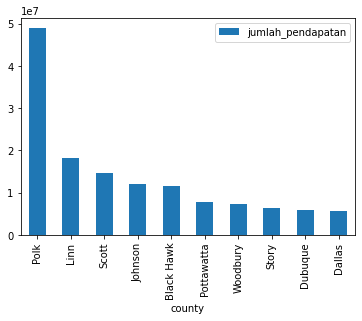

In [333]:
# Melakukan plotting dengan mengambil 10 data awal dari tabel. 

jumlah_pendapatan.head(10).plot(kind="bar",x='county',y='jumlah_pendapatan')

Plot yang dihasilkan dari tabel dengan mengambil 10 data tertinggi. Selanjutnya penulis akan mencari minuman apa saja yang disukai orang iowa, dan apakah minuman yang memiliki penjualan tertinggi mempunyai pendapatan tertinggi juga?

#### 5. Mencari penjualan minuman tertinggi di iowa.

In [334]:
# Melakukan grouping berdasarkan nama minuman.
# Melakukan kalkulasi dimana botol_terjual akan ditambahkan sesuai dengan nama minuman.
# Direset index agar kolom grouping bisa dipanggil kembali untuk kalkulasi.
# Diurutkan menurut penjualan botol tertinggi.

penjualan_minuman=df.groupby("nama_minuman")["botol_terjual"].sum() \
                    .reset_index().sort_values("botol_terjual",ascending=False)
penjualan_minuman

,nama_minuman,botol_terjual
1612,Fireball Cinnamon Whiskey,4330444
4276,Titos Handmade Vodka,2051735
517,Black Velvet,1720408
799,Captain Morgan Original Spiced,1023916
2039,Hawkeye Vodka,1017519
...,...,...
3916,Sooh Margaritaville Silver Tequila,1
1229,Deep Eddy Vodka Mini,1
4167,Tequila 3 Amigos Blanco Mini,1
4528,Woodford Reserve Kentucky Derby 2020,1


Ternyata Fireball Cinnamon Whiskey adalah minuman favorite masyarakat iowa, yang dimana melebihi 2x penjualan jenis minuman di posisi 2. Selanjutnya akan dilakukan visualisasi menggunakan plot agar tabel lebih mudah dibaca.

<AxesSubplot:xlabel='nama_minuman'>

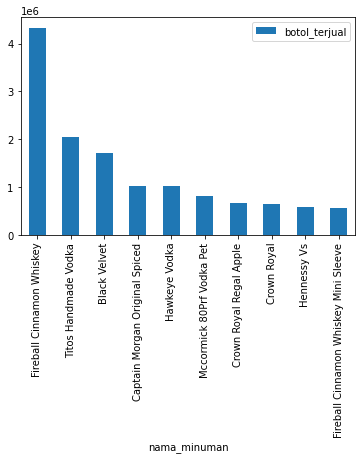

In [335]:
# Melakukan plotting dengan mengambil 10 data awal dari tabel.

penjualan_minuman.head(10).plot(kind="bar",x="nama_minuman",y="botol_terjual")

Plot hasil tabel penjualan minuman, dimana diambil 10 jenis minuman dengan penjualan tertinggi. Setelah ini penulis akan melakukan kalkulasi untuk mencari pendapatan minuman tertinggi, karena tidak menutup kemungkinan meskipun minuman Fireball Cinnamon Whiskey memiliki penjualan terbanyak, namun pendapatan dari penjualan tersebut tidak terlalu baik. Oleh karena itu masih ada kemungkinan minuman yang memiliki nilai penjualan tertinggi dipegang oleh minuman lain.

#### 6. Mencari pendapatan minuman tertinggi

In [336]:
# Melakukan grouping berdasarkan nama_minuman.
# Pendapatan akan dijumlahkan sesuai dengan nama minuman.
# Direset index agar kolom yang dipakai grouping bisa dipanggil kembali untuk kalkulasi.
# Mengganti nama kolom pendapatan menjadi pendapatan_USD.

pendapatan_minuman=df.groupby("nama_minuman")["pendapatan"].sum().reset_index() \
                     .sort_values("pendapatan",ascending=False)\
                     .rename({"pendapatan":"pendapatan_USD"},axis=1)
pendapatan_minuman

,nama_minuman,pendapatan_USD
4276,Titos Handmade Vodka,12923227.98
517,Black Velvet,5992757.65
1612,Fireball Cinnamon Whiskey,5574805.68
799,Captain Morgan Original Spiced,5560040.77
1154,Crown Royal,5421110.35
...,...,...
2136,Hornitos Plata W/Glasses,6.75
578,Bols Melon,5.42
3916,Sooh Margaritaville Silver Tequila,3.92
2033,Hawkeye Blended Whiskey Disco,1.75


Ternyata untuk pendapatan Fireball Cinnamon Whiskey hanya berada diposisi 3, Sementara Titos Handmade Vodka memiliki jumlah pendapatan tertinggi meskipun penjualan dari minuman tersebut hanya 1/2 dari penjualan Fireball Cinnamon Whiskey. Selanjutnya akan dilakukan proses plotting agar tabel mudah dibaca.

<AxesSubplot:xlabel='nama_minuman'>

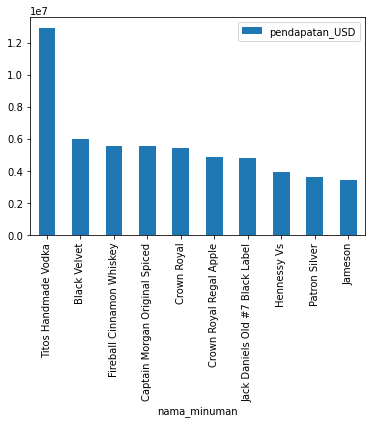

In [337]:
# Melakukan plotting dengan mengambil 10 nilai awal pada tabel.

pendapatan_minuman.head(10).plot(kind="bar",x='nama_minuman',y='pendapatan_USD')

Plot yang dihasilkan oleh tabel diatas, dengan mengambil 10 nilai teratas. Selanjutnya penulis ingin mengetahui minuman apa saja yang disukai masyarakat masing masing county.

#### 7. Mencari minuman dengan penjualan tertinggi pada tiap county.

In [338]:
# Dilakukan grouping berdasarkan county dan nama minuman, lalu kolom botol_terjual dijumlahkan.
# Direset indexnya agar semua kolom bisa dipanggil kembali bila dibutuhkan untuk kalkulasi.
# Diurutkan menurut county, kemudian jumlah botol terjual. Dimana county berurutan A-Z sementara
# penjualan botol diurutkan dari nilai tertinggi.
# Merubah nama kolom botol_terjual menjadi jumlah_penjualan agar mudah dimengerti.

county_minuman=df.groupby(['county', 'nama_minuman'])["botol_terjual"]\
                 .sum().reset_index().sort_values(['county','botol_terjual']\
                 , ascending=[True,False]).rename({'botol_terjual':'jumlah_penjualan'},axis=1)
county_minuman

,county,nama_minuman,jumlah_penjualan
137,Adair,Fireball Cinnamon Whiskey,6611
53,Adair,Black Velvet,5336
168,Adair,Hawkeye Vodka,3182
368,Adair,Titos Handmade Vodka,2932
250,Adair,Mccormick 80Prf Vodka Pet,2386
...,...,...,...
133744,Wright,Sip Shine Razz-Berry Shineade,1
133754,Wright,Slipknot Iowa Whiskey No. 9 Reserve,1
133771,Wright,Somrus Coffee Grab N Go Mini,1
133803,Wright,Three Olives Loopy,1


Dihasilkan tabel diatas, tabel ini harus dilakukan proses lanjutan agar bisa menghasilkan data yang kita cari.

In [339]:
# Dilakukan ranking menurut jumlah penjualan yang akan dipisahkan pada tiap county.
# Sehingga rank 1 tiap county berbeda.
# Dilakukan filtering dimana data yang diambil hanyalah yang memiliki rank 1.
# Difilter kolomnya dimana rank tidak akan diambil karena tidak terlalu berfungsi pada tabel baru.
# Dilakukan ranking kembali untuk melihat county dengan jumlah penjualan tertinggi
# Diurutkan menurut nilai jumlah penjualan tertinggi.

county_minuman['rank']=county_minuman.groupby('county')['jumlah_penjualan']\
                       .rank(method='first',ascending=False)
county_minuman=county_minuman.loc[county_minuman['rank']==1]
county_minuman=county_minuman[['county','nama_minuman','jumlah_penjualan']]
county_minuman['rank']=county_minuman['jumlah_penjualan'].rank(method='first',ascending=False)
county_minuman=county_minuman.sort_values('jumlah_penjualan', ascending=False)
county_minuman

,county,nama_minuman,jumlah_penjualan,rank
100882,Polk,Fireball Cinnamon Whiskey,1239391,1.0
73973,Linn,Fireball Cinnamon Whiskey,448128,2.0
109490,Scott,Fireball Cinnamon Whiskey,382966,3.0
104018,Pottawatta,Fireball Cinnamon Whiskey,256582,4.0
130885,Woodbury,Fireball Cinnamon Whiskey,219939,5.0
...,...,...,...,...
33550,Decatur,Black Velvet,2198,95.0
125150,Wayne,Black Velvet,1626,96.0
107279,Ringgold,Hawkeye Vodka,1476,97.0
119699,Van Buren,Titos Handmade Vodka,1391,98.0


Ternyata di 5 county tertinggi, Fireball Cinnamon Whiskey adalah favorit masyarakatnya. Namun penulis penasaran apakah ada county yang masyarakanta menyukai Titos Handmade Vodka. Dilakukan filtering pada tabel tersebut.

In [340]:
# Dilakukan filtering dimana titos handmade vodka adalah minuman
# favorite di county tersebut.

county_minuman.loc[county_minuman['nama_minuman']=='Titos Handmade Vodka']\
              .sort_values('jumlah_penjualan',ascending=False)

,county,nama_minuman,jumlah_penjualan,rank
66383,Johnson,Titos Handmade Vodka,125075,8.0
116661,Story,Titos Handmade Vodka,56442,15.0
38834,Dickinson,Titos Handmade Vodka,44085,18.0
63262,Jefferson,Titos Handmade Vodka,9299,62.0
119699,Van Buren,Titos Handmade Vodka,1391,98.0


Ternyata ada 5 tempat. Dimana county johnson memiliki tingkat pendapatan tertinggi di ranking 8. Dikarenakan kita ingin melakukan investasi pada tempat yang memiliki potensi tinggi, perlu dilakukan analisa statistik lebih lanjut. Disini penulis akan mencari pertumbuhan rata rata untuk menghitung pertumbuhan ekonomi perbulan yang paling pesat pada county 3 besar, yaitu polk, linn dan scott.

### 8. Menghitung persentase pertumbuhan pendapatan pada 3 county yang memiliki pendapatan tertinggi

Dikarenakan keterbatasan penulis, hasil dari aggregating berupa dictionary. Maka digunakan variable yang akan menampung dictionary tersebut sebelum dijadikan dataframe.

In [341]:
# Membuat variable yang akan menampung hasil dari aggregating per county.

analisa=[]

In [342]:
# Diambil kolom county,year,month dan pendapatan dari dataset utama
# dan di filter dimana hanya county polk saja.
# Diurutkan berdasarkan bulan.

polk=df[['county','year','month','pendapatan']].loc[df['county']=='Polk'].sort_values('month')
polk

,county,year,month,pendapatan
9,Polk,2021,1,12.00
2381303,Polk,2022,1,60.00
2381304,Polk,2022,1,12.39
2381307,Polk,2022,1,36.00
2381308,Polk,2022,1,31.38
...,...,...,...,...
1336986,Polk,2021,12,111.00
1336988,Polk,2021,12,14.00
1336995,Polk,2021,12,25.80
1336998,Polk,2021,12,189.00


Dihasilkan tabel seperti ini, selanjutnya akan dilakukan proses groupby, dimana akan menghasilkan nilai pendapatan perbulan agar bisa terukur pertumbuhannya.

In [343]:
# Melakukan grouping berdasarkan tahun dan bulan agar terpisah bulan 1
# pada tahun 2021 dan 2022.
# Kolom pendapatan dijumlahkan.
# Index direset agar bisa dipanggil kembali seluruh kolomnya.

polk=polk.groupby(['year','month'])['pendapatan'].sum().reset_index()
polk

,year,month,pendapatan
0,2021,1,2065287.52
1,2021,2,2204298.55
2,2021,3,2755441.39
3,2021,4,2889790.53
4,2021,5,2550355.67
5,2021,6,2923748.68
6,2021,7,2804449.92
7,2021,8,2821472.90
8,2021,9,2876471.22
9,2021,10,3246667.38


Tabel ini sudah dapat dilakukan kalkulasi differential untuk mencari persentase pertumbuhan pendapatan pada county polk.

In [344]:
# Penambahan kolom baru yang akan diisikan nilai perbedaan antara bulan
# saat ini dengan bulan lalu.
# Penambahan kolom baru yang akan diisikan nilai persentase kenaikan
# pendapatan, dengan cara nilai kenaikan dibagi oleh nilai pendapatan.

polk['kenaikan']=polk['pendapatan'].diff()
polk['persentase']=polk['kenaikan']/polk['pendapatan']
polk

,year,month,pendapatan,kenaikan,persentase
0,2021,1,2065287.52,NaN,NaN
1,2021,2,2204298.55,139011.03,0.063064
2,2021,3,2755441.39,551142.84,0.200020
3,2021,4,2889790.53,134349.14,0.046491
4,2021,5,2550355.67,-339434.86,-0.133093
5,2021,6,2923748.68,373393.01,0.127710
6,2021,7,2804449.92,-119298.76,-0.042539
7,2021,8,2821472.90,17022.98,0.006033
8,2021,9,2876471.22,54998.32,0.019120
9,2021,10,3246667.38,370196.16,0.114023


Telah berhasil mendapatkan nilai kenaikan dan persentasenya, selanjutnya bisa diolah lebih lanjut untuk mendapatkan persentase kenaikan rata-rata pada county polk.

In [345]:
# Membuat variabel yang akan menyimpan dictionary yang nanti akan dimasukan ke variable analisa.

a_polk={}

In [346]:
# Membuat key dan value, untuk nama county di isikan nama 'Polk'
# Mengambil nilai pendapatan terakhir menggunakan indexing
# Melakukan aggregating menggunakan sum,count,mean,skew,dan std
# dengan mengambil nilai dari kolom 'kenaikan'
# Melakukan aggregating menggunakan mean untuk mendapatkan persentase
# pertumbuhan rata-rata.
# Setelah semua nilai masuk dictionary, akan di append dimasukan ke
# variabel analisa.

a_polk['county']='Polk'
a_polk['pendapatan_terakhir']=polk.pendapatan[17]
a_polk['sum']=polk['kenaikan'].sum()
a_polk['persentase']=polk['persentase'].mean()
a_polk['count']=polk['kenaikan'].count()
a_polk['skew']=polk['kenaikan'].skew()
a_polk['mean']=polk['kenaikan'].mean()
a_polk['std']=polk['kenaikan'].std()
analisa.append(a_polk)
analisa

[{'county': 'Polk',
  'pendapatan_terakhir': 2955328.02,
  'sum': 890040.5,
  'persentase': 0.007799837365009019,
  'count': 17,
  'skew': -1.3702027498825402,
  'mean': 52355.32352941176,
  'std': 439207.4526055553}]

Data sudah tersimpan pada variable list. Selanjutnya akan diulang semua proses diatas menggunakan nilai dari county linn dan scott.

In [347]:
# Diambil kolom county,year,month dan pendapatan dari dataset utama
# dan di filter dimana hanya county linn saja.
# Diurutkan berdasarkan bulan.

linn=df[['county','year','month','pendapatan']].loc[df['county']=='Linn'].sort_values('month')
linn

,county,year,month,pendapatan
6,Linn,2021,1,38.88
2359250,Linn,2022,1,19.50
2359248,Linn,2022,1,45.12
2359237,Linn,2022,1,30.00
2359227,Linn,2022,1,12.00
...,...,...,...,...
554040,Linn,2021,12,79.44
554042,Linn,2021,12,2277.00
554056,Linn,2021,12,125.76
554085,Linn,2021,12,89.94


Tabel yang dihasilkan adalah seperti ini. Akan dilakukan grouping lanjut agar bisa dilakukan kalkulasi differential untuk mendapatkan persentasi pertumbuhan pendapatan pada county linn.

In [348]:
# Melakukan grouping berdasarkan tahun dan bulan agar terpisah bulan 1
# pada tahun 2021 dan 2022.
# Kolom pendapatan dijumlahkan.
# Index direset agar bisa dipanggil kembali seluruh kolomnya.

linn=linn.groupby(['year','month'])['pendapatan'].sum().reset_index()
linn

,year,month,pendapatan
0,2021,1,912095.32
1,2021,2,822694.30
2,2021,3,1043896.30
3,2021,4,972906.60
4,2021,5,1012211.75
5,2021,6,1111991.67
6,2021,7,998219.74
7,2021,8,1027406.12
8,2021,9,985349.17
9,2021,10,1077978.15


Selanjutnya akan dilakukan kalkulasi differential dan kalkulasi persentase kenaikan pendapatan.

In [349]:
# Penambahan kolom baru yang akan diisikan nilai perbedaan antara bulan
# saat ini dengan bulan lalu.
# Penambahan kolom baru yang akan diisikan nilai persentase kenaikan
# pendapatan, dengan cara nilai kenaikan dibagi oleh nilai pendapatan.

linn['kenaikan']=linn['pendapatan'].diff()
linn['persentase']=linn['kenaikan']/linn['pendapatan']
linn

,year,month,pendapatan,kenaikan,persentase
0,2021,1,912095.32,NaN,NaN
1,2021,2,822694.30,-89401.02,-0.108669
2,2021,3,1043896.30,221202.00,0.211900
3,2021,4,972906.60,-70989.70,-0.072967
4,2021,5,1012211.75,39305.15,0.038831
5,2021,6,1111991.67,99779.92,0.089731
6,2021,7,998219.74,-113771.93,-0.113975
7,2021,8,1027406.12,29186.38,0.028408
8,2021,9,985349.17,-42056.95,-0.042682
9,2021,10,1077978.15,92628.98,0.085928


Nilai kenaikan dan persentase telah didapatkan, selanjutnya bisa diolah data ini untuk mendapatkan central tendency nya.

In [350]:
# Membuat variabel yang akan menyimpan dictionary yang nanti akan dimasukan ke variable analisa.

a_linn={}

In [351]:
# Membuat key dan value, untuk nama county di isikan nama 'Linn'
# Mengambil nilai pendapatan terakhir menggunakan indexing
# Melakukan aggregating menggunakan sum,count,mean,skew,dan std
# dengan mengambil nilai dari kolom 'kenaikan'
# Melakukan aggregating menggunakan mean untuk mendapatkan persentase
# pertumbuhan rata-rata.
# Setelah semua nilai masuk dictionary, akan di append dimasukan ke
# variabel analisa.

a_linn['county']='Linn'
a_linn['pendapatan_terakhir']=linn.pendapatan[17]
a_linn['sum']=linn['kenaikan'].sum()
a_linn['persentase']=linn['persentase'].mean()
a_linn['count']=linn['kenaikan'].count()
a_linn['skew']=linn['kenaikan'].skew()
a_linn['mean']=linn['kenaikan'].mean()
a_linn['std']=linn['kenaikan'].std()
analisa.append(a_linn)
analisa

[{'county': 'Polk',
  'pendapatan_terakhir': 2955328.02,
  'sum': 890040.5,
  'persentase': 0.007799837365009019,
  'count': 17,
  'skew': -1.3702027498825402,
  'mean': 52355.32352941176,
  'std': 439207.4526055553},
 {'county': 'Linn',
  'pendapatan_terakhir': 1052794.17,
  'sum': 140698.84999999998,
  'persentase': -0.0009775885252482264,
  'count': 17,
  'skew': -1.5639159594525618,
  'mean': 8276.40294117647,
  'std': 134103.88453185445}]

Data yang diolah telah masuk ke variabel list analisa. Selanjutnya akan dilakukan hal yang sama namun menggunakan data dari county Scott.

In [352]:
# Diambil kolom county,year,month dan pendapatan dari dataset utama
# dan di filter dimana hanya county scott saja.
# Diurutkan berdasarkan bulan.

scott=df[['county','year','month','pendapatan']].loc[df['county']=='Scott'].sort_values('month')
scott

,county,year,month,pendapatan
3,Scott,2021,1,31.38
2357876,Scott,2022,1,64.08
2357875,Scott,2022,1,15.84
2357859,Scott,2022,1,5.16
2357841,Scott,2022,1,6.50
...,...,...,...,...
1355822,Scott,2021,12,42.00
1355847,Scott,2021,12,45.00
1355876,Scott,2021,12,49.02
1355937,Scott,2021,12,8.50


Tabel yang dihasilkan dari query diatas. Selanjutnya akan dilakukan proses grouping agar bisa dilakukan kalkulasi lebih lanjut.

In [353]:
# Melakukan grouping berdasarkan tahun dan bulan agar terpisah bulan 1
# pada tahun 2021 dan 2022.
# Kolom pendapatan dijumlahkan.
# Index direset agar bisa dipanggil kembali seluruh kolomnya.

scott=scott.groupby(['year','month'])['pendapatan'].sum().reset_index()
scott

,year,month,pendapatan
0,2021,1,685320.13
1,2021,2,680577.14
2,2021,3,996731.06
3,2021,4,756321.54
4,2021,5,762758.35
5,2021,6,1027904.18
6,2021,7,736048.66
7,2021,8,923968.72
8,2021,9,828935.70
9,2021,10,838561.52


Dihasilkan tabel diatas. Data sudah bisa dilakukan kalkulasi differential dan pencarian persentase pertumbuhan pendapatan.

In [354]:
# Penambahan kolom baru yang akan diisikan nilai perbedaan antara bulan
# saat ini dengan bulan lalu.
# Penambahan kolom baru yang akan diisikan nilai persentase kenaikan
# pendapatan, dengan cara nilai kenaikan dibagi oleh nilai pendapatan.

scott['kenaikan']=scott['pendapatan'].diff()
scott['persentase']=scott['kenaikan']/scott['pendapatan']
scott

,year,month,pendapatan,kenaikan,persentase
0,2021,1,685320.13,NaN,NaN
1,2021,2,680577.14,-4742.99,-0.006969
2,2021,3,996731.06,316153.92,0.317191
3,2021,4,756321.54,-240409.52,-0.317867
4,2021,5,762758.35,6436.81,0.008439
5,2021,6,1027904.18,265145.83,0.257948
6,2021,7,736048.66,-291855.52,-0.396517
7,2021,8,923968.72,187920.06,0.203384
8,2021,9,828935.70,-95033.02,-0.114645
9,2021,10,838561.52,9625.82,0.011479


Sudah dihasilkan data kenaikan dan persentase pertumbuhan pendapatan. Akan dilakukan analisa lebih lanjut dengan mengambil data central tendency dari tabel diatas.

In [355]:
# Membuat variabel yang akan menyimpan dictionary yang nanti akan dimasukan ke variable analisa.

a_scott={}

In [356]:
# Membuat key dan value, untuk nama county di isikan nama 'Scott'
# Mengambil nilai pendapatan terakhir menggunakan indexing
# Melakukan aggregating menggunakan sum,count,mean,skew,dan std
# dengan mengambil nilai dari kolom 'kenaikan'
# Melakukan aggregating menggunakan mean untuk mendapatkan persentase
# pertumbuhan rata-rata.
# Setelah semua nilai masuk dictionary, akan di append dimasukan ke
# variabel analisa.

a_scott['county']='Scott'
a_scott['pendapatan_terakhir']=scott.pendapatan[17]
a_scott['sum']=scott['kenaikan'].sum()
a_scott['persentase']=scott['persentase'].mean()
a_scott['count']=scott['kenaikan'].count()
a_scott['skew']=scott['kenaikan'].skew()
a_scott['mean']=scott['kenaikan'].mean()
a_scott['std']=scott['kenaikan'].std()
analisa.append(a_scott)
analisa

[{'county': 'Polk',
  'pendapatan_terakhir': 2955328.02,
  'sum': 890040.5,
  'persentase': 0.007799837365009019,
  'count': 17,
  'skew': -1.3702027498825402,
  'mean': 52355.32352941176,
  'std': 439207.4526055553},
 {'county': 'Linn',
  'pendapatan_terakhir': 1052794.17,
  'sum': 140698.84999999998,
  'persentase': -0.0009775885252482264,
  'count': 17,
  'skew': -1.5639159594525618,
  'mean': 8276.40294117647,
  'std': 134103.88453185445},
 {'county': 'Scott',
  'pendapatan_terakhir': 841345.77,
  'sum': 156025.64,
  'persentase': -0.010473207861859237,
  'count': 17,
  'skew': -0.40566288606617174,
  'mean': 9177.978823529413,
  'std': 178336.67456373724}]

Dataset telah tersimpan pada variabel list analisa. Selanjutnya akan dibuatkan dataframe

In [357]:
analisa_big3=pd.DataFrame.from_dict(analisa, orient='columns')
analisa_big3

,county,pendapatan_terakhir,sum,persentase,count,skew,mean,std
0,Polk,2955328.02,890040.50,0.007800,17,-1.370203,52355.323529,439207.452606
1,Linn,1052794.17,140698.85,-0.000978,17,-1.563916,8276.402941,134103.884532
2,Scott,841345.77,156025.64,-0.010473,17,-0.405663,9177.978824,178336.674564


Dataframe telah dibuat. dapat disimpulkan persentase kenaikan tertinggi terdapat pada county polk. Maka akan diakukan analisa lebih lanjut hanya pada county polk saja, agar perusahaan bisa menargetkan dengan lebih spesifik dan untuk county linn scott sedang dalam masa penurunan pendapatannya sehingga kita tidak akan melakukan investasi disana. Dan terakhir distribusi data pertumbuhan county polk merupakan distribusi skew.

#### Analisa lebih dalam pada county polk

Karena sudah diketahui skewness dari distribusi kenaikan penghasilan polk, dilakukan IQR method untuk mendeteksi outlier.

In [358]:
# Membuat dataframe baru untuk mengolah data akhir

olah_data=pd.DataFrame()

In [359]:
# Menghitung quartil 1 dan 3 menggunakan fungsi quantile
# Dilakukan perhitungan IQR dari nilai Q3 dan Q1

Q1=polk['persentase'].quantile(0.25)
Q3=polk['persentase'].quantile(0.75)
IQR= Q3-Q1
IQR

0.14695026794754987

Dihasilkan nilai IQR

In [360]:
# Selanjutnya mencari batasan atas dan bawah untuk melakukan filter
# outlier.

lim_low= Q1-(1.5*IQR)
lim_high= Q3+(1.5*IQR)
lim_low

-0.253352237015707

Dihasilkan batasan bawah data.

In [361]:
lim_high

0.33444883477449244

Dihasilkan batasan atas data.

In [362]:
# Untuk menghindari error dalam perhitungan
# Dilakukan pengisian nilau null dengan nilai 0.

polk.fillna(0,inplace=True)

<AxesSubplot:>

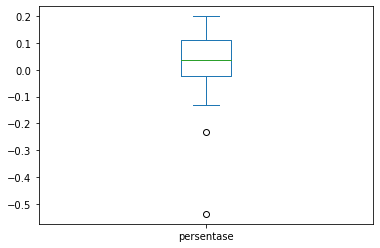

In [363]:
# Melakukan plotting box untuk melihat apakah ada outlier atau tidak di data.
polk.plot(kind='box',y='persentase')

Kelihatannya terdapat 2 data outlier. Selanjutnya outlier akan diganti nilainya menjadi median, karena datanya berkorelasi dengan waktu.

In [364]:
# Merubah nilai yang diluar batas IQR oleh median

median=polk['persentase'].median()
polk['persentase']=np.where((polk['persentase']>= lim_high)&(polk['persentase']<= lim_low),median,polk['persentase'])
polk


,year,month,pendapatan,kenaikan,persentase
0,2021,1,2065287.52,0.00,0.000000
1,2021,2,2204298.55,139011.03,0.063064
2,2021,3,2755441.39,551142.84,0.200020
3,2021,4,2889790.53,134349.14,0.046491
4,2021,5,2550355.67,-339434.86,-0.133093
5,2021,6,2923748.68,373393.01,0.127710
6,2021,7,2804449.92,-119298.76,-0.042539
7,2021,8,2821472.90,17022.98,0.006033
8,2021,9,2876471.22,54998.32,0.019120
9,2021,10,3246667.38,370196.16,0.114023


<AxesSubplot:>

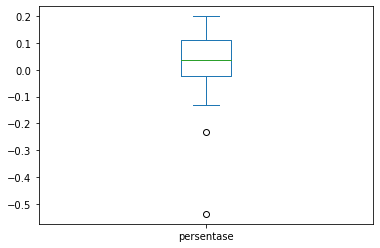

In [365]:
# Dilakukan plotting box untuk melihat distribusi data.

polk.plot(kind="box",y="persentase")

Dari 20 data ternyata ada 1 outlier, yaitu bulan januari 2022.Dan bila melihat box plot, masih ada 1 data yang diluar dari Q1-Q3, oleh karena itu distribusi data masih skewed.

In [366]:
# Melihat nilai skew apakah benar dibawah -0.5 sehingga distribusi masih skewed.

polk['persentase'].skew()

-1.9768356178833315

Dan benar hasilnya masih skewed distribution dikarenakan masih dibawah -0.5. Selanjutnya diolah datanya untuk mencari data yang dibutuhkan kalkulasi confidence interval.

In [367]:
# Membuat variable mean yang akan memiliki nilai mean dari kolom persentase
# Membuat variable county yang akan memiliki jumlah bari dari kolom persentase - 1
# Membuat variable stsem yang memiliki nilai standard error dari mean

mean=polk['persentase'].mean()
count=polk['persentase'].count()-1
stsem=stats.sem(polk['persentase'])
mean

0.007366513066952962

Berikut nilai mean dari kolom persentase.

In [368]:
count

17

Berkut nilai count dari kolom persentase.

In [369]:
stsem

0.04100929063416287

Berikut nilai standard error mean dari kolom persentase.

In [370]:
# Menggunakan fitur T-Test dikarenakan jumlah data dibawah 30
# Dibutuhkan nilai jumlah baris - 1, mean dan standard error of mean.

stats.t.interval(alpha=0.95,df=count,loc=mean,scale=stsem)

(-0.07915552714889222, 0.09388855328279815)

Didapatkan nilai confidence interval terendah dan tertinggi, selanjutnya akan dilakukan kalkulasi untuk mendapatkan nilai pendapatan pada bulan depan di polk.

In [371]:
# Membuat variabel yang memiliki nilai confidence interval.

CI95_low=-0.07915552714889222
CI95_high=0.09388855328279815

In [397]:
# Dilakukan kalkulasi dimana data pendapatan terakhir akan dikalikan dengan persentase
# batas bawah CI.
# Mean dari kolom persentase dikurangi nilai batas bawah CI lalu ditambahkan 1. 

bulan_depan_low=polk['pendapatan'].iloc[-1]*((mean-CI95_low)+1)
bulan_depan_low

2981642.754231785

In [398]:
# Dilakukan kalkulasi dimana data pendapatan terakhir akan dikalikan dengan persentase
# batas atas CI.
# Mean dari kolom persentase ditambah nilai batas atas CI lalu ditambahkan 1. 

bulan_depan_high=polk['pendapatan'].iloc[-1]*((mean+CI95_high)+1)
bulan_depan_high

3209840.2446599877

In [399]:
print((f'Penghasilan polk pada bulan depan berdasarkan confidence interval 95%, berada di range {bulan_depan_low} sampai {bulan_depan_high}'))

Penghasilan polk pada bulan depan berdasarkan confidence interval 95%, berada di range 2981642.754231785 sampai 3209840.2446599877


Penghasilan polk pada bulan depan berdasarkan confidence interval 95%, berada di range 3172481.823 sampai 3405546.026

#### 9. Mencari prediksi pendapatan total di iowa pada 1 bulan kedepan.

In [375]:
# Melakukan grouping berdasarkan year dan month dari dataset utama,
# dan dijumlahkan pendapatannya

total=df.groupby(['year','month'])['pendapatan'].sum().reset_index()
total

,year,month,pendapatan
0,2021,1,9553838.89
1,2021,2,9876975.82
2,2021,3,12270138.67
3,2021,4,11571918.27
4,2021,5,11228231.77
5,2021,6,12985685.08
6,2021,7,11724830.36
7,2021,8,12181902.39
8,2021,9,11986129.88
9,2021,10,12683904.64


Dataset hasil pengambilan query grouping diatas. Selanjutnya akan dilakukan kalkulasi differential dan rata rata persentase pertumbuhan pendapatan.

In [376]:
# Menggunakan fungsi diff untuk mendapatkan nilai differential.
# Membuat kolom baru kenaikan untuk nilai differential.

total['kenaikan']=total['pendapatan'].diff()
total

,year,month,pendapatan,kenaikan
0,2021,1,9553838.89,NaN
1,2021,2,9876975.82,323136.93
2,2021,3,12270138.67,2393162.85
3,2021,4,11571918.27,-698220.40
4,2021,5,11228231.77,-343686.50
5,2021,6,12985685.08,1757453.31
6,2021,7,11724830.36,-1260854.72
7,2021,8,12181902.39,457072.03
8,2021,9,11986129.88,-195772.51
9,2021,10,12683904.64,697774.76


In [377]:
# Kalkulasi kolom kenaikan dibagi kolom pendapatan untuk mendapatkan
# persentase.

total['persentase']=total['kenaikan']/total['pendapatan']
total

,year,month,pendapatan,kenaikan,persentase
0,2021,1,9553838.89,NaN,NaN
1,2021,2,9876975.82,323136.93,0.032716
2,2021,3,12270138.67,2393162.85,0.195040
3,2021,4,11571918.27,-698220.40,-0.060337
4,2021,5,11228231.77,-343686.50,-0.030609
5,2021,6,12985685.08,1757453.31,0.135338
6,2021,7,11724830.36,-1260854.72,-0.107537
7,2021,8,12181902.39,457072.03,0.037521
8,2021,9,11986129.88,-195772.51,-0.016333
9,2021,10,12683904.64,697774.76,0.055013


In [378]:
# Mengisi nilai Null menjadi 0

total=total.fillna(0)
total

,year,month,pendapatan,kenaikan,persentase
0,2021,1,9553838.89,0.00,0.000000
1,2021,2,9876975.82,323136.93,0.032716
2,2021,3,12270138.67,2393162.85,0.195040
3,2021,4,11571918.27,-698220.40,-0.060337
4,2021,5,11228231.77,-343686.50,-0.030609
5,2021,6,12985685.08,1757453.31,0.135338
6,2021,7,11724830.36,-1260854.72,-0.107537
7,2021,8,12181902.39,457072.03,0.037521
8,2021,9,11986129.88,-195772.51,-0.016333
9,2021,10,12683904.64,697774.76,0.055013


Setelah 2 nilai tersebut diketahui. Dilakukan proses statistical descriptive berupa skewness dari distribusi, dan central tendency. Skewness akan menentukan penggunaan IQR atau Z-Score untuk eliminasi outlier.

In [379]:
# Mencari nilai mean,median,count dan skewness dari
# kolom persentase
# Memanggil nilai mean

mean = total['persentase'].mean()
median=  total['persentase'].median()
count= total['persentase'].count()-1
skew= total['persentase'].skew()
mean


0.0066318987513509274

In [380]:
# Memanggil nilai median

median

0.03285829094986839

In [381]:
# Memanggil nilai count

count

17

In [382]:
# memanggil nilai skew

skew

-2.4786059482678384

Dihasilkan mean, median dan count berikut. Dan skewness bernilai -2.4308 dimana kurang dari -0.5. Maka distribusi data adalah skewed distribution, dilakukan metode IQR untuk eliminasi outlier.

<AxesSubplot:>

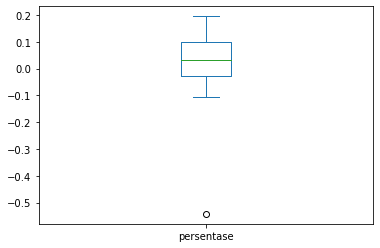

In [383]:
# Membuat box plot dimana sumbu y merupakan nilai di kolom persentase.

total.plot(kind='box',y='persentase')

Dari visual plot ditemuka 1 outlier. Selanjutnya dilakukan metode IQR.

In [384]:
# Melakukan kalkulasi dengan bantuan fungsi quantile
# untuk mencari Q1 dan Q3.
# Lalu dikalkulasikan ke IQR.
# Memanggil nilai Q1

Q1=total['persentase'].quantile(0.25)
Q3=total['persentase'].quantile(0.75)
IQR = Q3-Q1
Q1


-0.02704016741345865

In [385]:
# Memanggil nilai Q3

Q3

0.09983328924013922

In [386]:
# Memanggil nilai IQR

IQR

0.12687345665359787

Berikut nilai Q1, Q3 dan IQR. Selanjutnya akan ditentukan limit dari data non outlier.

In [387]:
# Menggunakan nilai 1.5 karena skewness lumayan tinggi, sehingga penulis
# ingin distribusi menjadi normal.
# Memanggil nilai batas bawah.

low_lim=Q1-(1.5*IQR)
high_lim=Q3+(1.5*IQR)
low_lim

-0.21735035239385547

In [388]:
# Memanggil nilai batas atas.

high_lim

0.29014347422053605

Berikut nilai batas atas dan batas bawah data non outlier. Selanjutnya dilakukan filtering data outlier, diubah menjadi median karena data berkorelasi dengan waktu.

In [389]:
# Merubah nilai diluar range IQR menjadi median.

total['persentase']=np.where((total['persentase']>= high_lim)|(total['persentase']<= low_lim),median,total['persentase'])
total

,year,month,pendapatan,kenaikan,persentase
0,2021,1,9553838.89,0.00,0.000000
1,2021,2,9876975.82,323136.93,0.032716
2,2021,3,12270138.67,2393162.85,0.195040
3,2021,4,11571918.27,-698220.40,-0.060337
4,2021,5,11228231.77,-343686.50,-0.030609
5,2021,6,12985685.08,1757453.31,0.135338
6,2021,7,11724830.36,-1260854.72,-0.107537
7,2021,8,12181902.39,457072.03,0.037521
8,2021,9,11986129.88,-195772.51,-0.016333
9,2021,10,12683904.64,697774.76,0.055013


Outlier sudah dirubah menjadi median, selanjutnya akan dilakukan pemeriksaan skewness dan plotting boxplot untuk melihat distribusi data.

<AxesSubplot:>

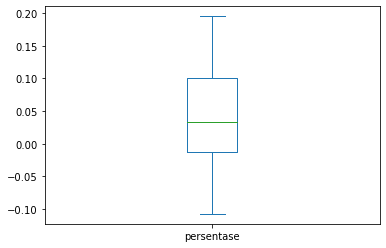

In [390]:
total.plot(kind='box',y='persentase')

In [391]:
# Melakukan pengecekan skewness.

total['persentase'].skew()

0.13932950261950575

Dari hasil diatas distrbusi data sudah berubah menjadi distribusi normal untuk kolom persentase. Dilanjutkan untuk proses statistik inferensial menggunakan metode confidence interval, guna memprediksi pendapatan 1 bulan kedepan.

In [392]:
# Mencari nilai standard mean error dari kolom.

stsem=stats.sem(total['persentase'])
stsem

0.019376274630685385

Dihasilkan nilai standard mean error, selanjutnya akan dilakukan kalkulasi Confidence interval menggunakan t.test.

In [393]:
# Melakukan kalkulasi confidence interval dengan metode t.test
# dikarenakan total data kurang dari 30.

stats.t.interval(alpha=0.95,df=count,loc=mean,scale=stsem)

(-0.034248467304842954, 0.047512264807544814)

Dihasilkan batas atas dan bawah dari CI. Selanjutnya akan dilakukan kalkulasi untuk mendapatkan nilai pendapatan pada bulan depan di iowa.

In [400]:
# Membuat variabel yang memiliki nilai confidence interval.

CI95_low=-0.034248467304842954
CI95_high=0.047512264807544814

In [401]:
# Dilakukan kalkulasi dimana data pendapatan terakhir akan dikalikan dengan persentase
# batas bawah CI.
# Mean dari kolom persentase dikurangi nilai batas bawah CI lalu ditambahkan 1. 

bulan_depan_low=total['pendapatan'].iloc[-1]*((mean-CI95_low)+1)
bulan_depan_low

13488036.060894175

In [402]:
# Dilakukan kalkulasi dimana data pendapatan terakhir akan dikalikan dengan persentase
# batas atas CI.
# Mean dari kolom persentase ditambah nilai batas atas CI lalu ditambahkan 1. 

bulan_depan_high=total['pendapatan'].iloc[-1]*((mean+CI95_high)+1)
bulan_depan_high

13659912.277273092

Dihasilkan range pendapatan di negara bagian iowa yang akan dihasilkan bulan depan dari batasan confidence interval adalah dari 13488036.061 USD sampai dengan 13659912.277 USD.

Dihasilkan lower dan upper limit dari range confidence interval adalah -0.039 sampai 0.053. Dilakukan prediksi menggunakan pendapatan bulan terakhir yang akan dikalikan dengan pertumbuhan rata-rata berdasarkan confidence interval.

Hasil dari plot dan skewness menunjukkan bahwa distribusi data sudah berubah menjadi distribusi normal. Selanjutnya akan dilakukan perhitungan confidence interval untuk memprediksi pendapatan 1 bulan kedepan.

### Overall Analysis

Dari analisa yang telah dilakukan, dapat beberapa poin yang bisa diambil
1. Jumlah County di negara bagian Iowa adalah 99.
2. Jumlah Toko minuman keras di negara bagian Iowa adalah 2034.
3. County yang memiliki penjualan tertinggi adalah county Polk.
4. County yang memiliki pendapatan tertinggi adalah county Polk.
5. Minuman yang paling disukai masyarakat Iowa adalah Fireball Cinnamon Whiskey.
6. Namun minuman yang memiliki pendapatan tertinggi adalah Titos Handmade Vodka, yang berada di posisi 3 pada penjualan terbanyak.
7. Masyarakat di county dengan penjualan tertinggi menyukai Fireball Cinnamon Whiskey.
8. County dengan rata-rata pertumbuhan tertinggi diantara 3 terbesar adalah county Polk, county lainnya sedang mengalami penurunan pendapatan.
9. County Polk memiliki distribusi persentase pertumbuhan dengan nilai skewness dibawah -0,5 yang dimana distrbusi skewed. Terdeteksi 1 outlier, dan sudah dibersihkan namun distribusi masih termasuk distribusi skewed.
10. Penghasilan polk pada bulan depan berdasarkan confidence interval 95%, berada di range 2981642.754 USD sampai 3209840.245 USD.
11. Persentase pertumbuhan pendapat di iowa memiliki distribusi data skewed dengan nilai skewness -2.430849934164163 dimana dibawah -0.5. Terdapat 1 outlier, dan sudah dibersihkan dan distribusi menjadi distribusi normal.
12. Penghasilan iowa pada bulan depan berdasarkan confidence interval 95%, berada di range 13488036.060 USD sampai dengan 13659912.277 USD.

Dapat disimpulkan bahwa investasi terbaik untuk saat ini adalah county polk yang dimana memiliki kurang lebih 22% dari pendapatan total di Iowa. Dan dari county 3 teratas hanya polk yang masih memiliki rata-rata pertumbuhan positif. Namun untuk alternatif perusahaan bisa melakukan investasi kepada vendor minuman dari Titos Handmade Vodka, dan melakukan riset lebih lanjut mengenai potensi pasar di iowa apakah ada pasar yang lebih besar sehingga bisa menyaingi Fireball Cinnamon Whiskey. Dikarenakan minuman tersebut merupakan minuman dengan pendapatan yang sangat tinggi, hampir 2x nya dengan jumlah penjualan kurang dari 2x nya dari Fireball Cinnamon Whiskey. Berarti memiliki perbandingan pendapatan 4:1 bila seimbang penjualan dengan Fireball Cinnamon Whiskey.


# Plot Tableau

![Step1](https://media.discordapp.net/attachments/258584857205145600/1035230711424221294/Plot_Tableau.png?width=1408&height=676)